In [27]:
# Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify as sq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read RFM_Final dataset
df = pd.read_csv('./datasets/1_SEGMENTATION/RFM_Final.csv')
df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,L,CLV
0,AA00312188,487,102,102182.25,0,11761.28
1,AA00312390,268,58,36476.70,0,5153.43
2,AA00325975,268,205,282986.00,200,20385.07
3,AA00336843,354,69,33192.50,138,2728.84
4,AA00339761,346,59,32488.30,0,7703.97


In [4]:
# Create a copy dataset with the same index as the original dataset to avoid any issues when merging the datasets
df_copy = df.copy()

In [5]:
df_copy.columns

Index(['CUSTOMER_ID', 'Recency', 'Frequency', 'Monetary', 'L', 'CLV'], dtype='object')

In [6]:
# Drop the columns that are not needed for the clustering analysis
df_copy = df_copy.drop(['CUSTOMER_ID'], axis=1)

# Check the columns that are left in the dataset
df_copy.columns

Index(['Recency', 'Frequency', 'Monetary', 'L', 'CLV'], dtype='object')

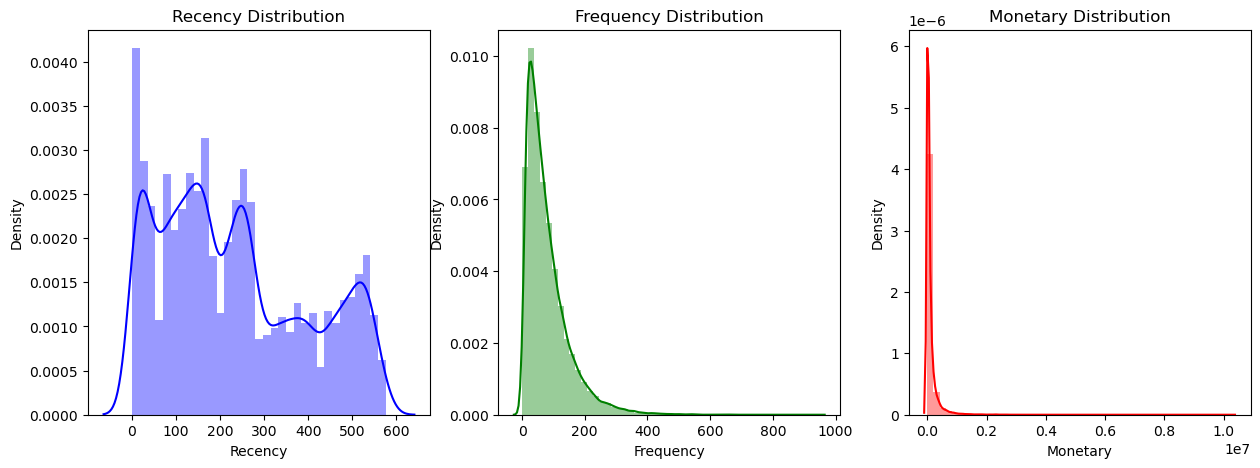

In [14]:
# Plot the distribution of the data
plt.figure(figsize=(15, 5))

# Plot subplots for Recency, Frequency and Monetary
plt.subplot(1, 3, 1)
sns.distplot(df_copy['Recency'], color='blue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.distplot(df_copy['Frequency'], color='green')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.distplot(df_copy['Monetary'], color='red')
plt.title('Monetary Distribution')

plt.show()

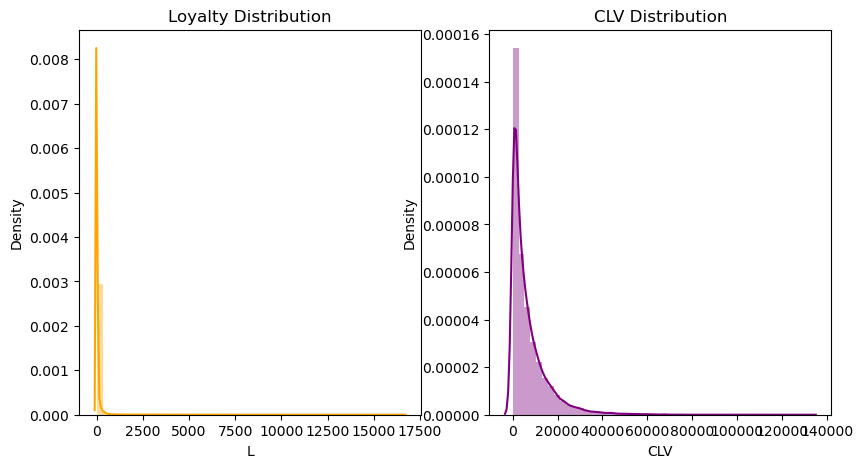

In [13]:
# Plot the distribution of the data
plt.figure(figsize=(15, 5))

# Plot subplots for L and CLV
plt.subplot(1, 3, 1)
sns.distplot(df_copy['L'], color='orange')
plt.title('Loyalty Distribution')

plt.subplot(1, 3, 2)
sns.distplot(df_copy['CLV'], color='purple')
plt.title('CLV Distribution')

plt.show()

- The data from is mostly skewed heavily to the left.
- The skeweness must be eliminated before proceeding

In [19]:
# Removal of skewness
recency_log = np.log1p(df_copy['Recency']).round(2)
frequency_log = np.log1p(df_copy['Frequency']).round(2)
monetary_log = np.log1p(df_copy['Monetary']).round(2)
loyalty_log = np.log1p(df_copy['L']).round(2)
clv_log = np.log1p(df_copy['CLV']).round(2)

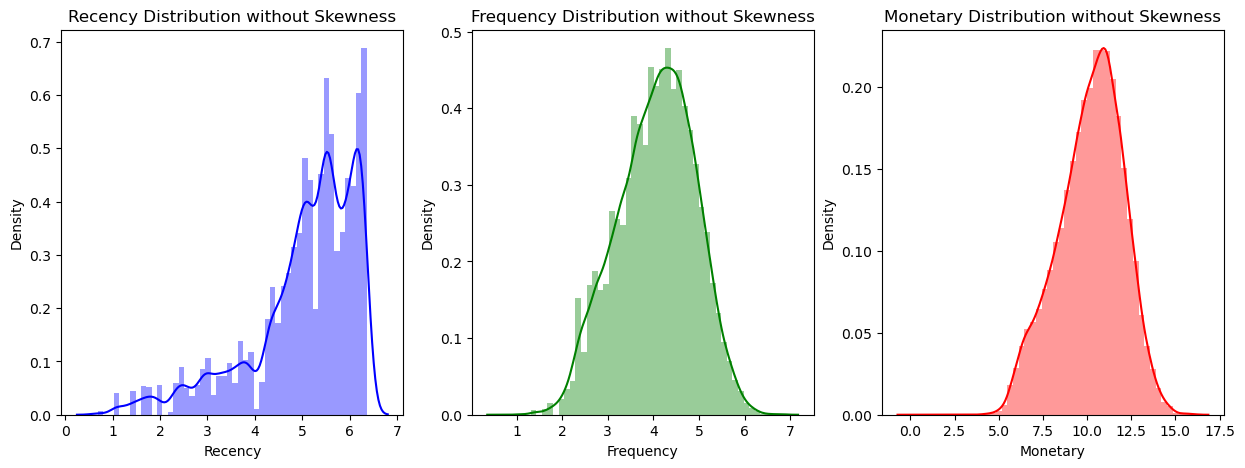

In [20]:
# Plot the distribution of the data
plt.figure(figsize=(15, 5))

# Plot subplots for Recency, Frequency and Monetary
plt.subplot(1, 3, 1)
sns.distplot(recency_log, color='blue')
plt.title('Recency Distribution without Skewness')

plt.subplot(1, 3, 2)
sns.distplot(frequency_log, color='green')
plt.title('Frequency Distribution without Skewness')

plt.subplot(1, 3, 3)
sns.distplot(monetary_log, color='red')
plt.title('Monetary Distribution without Skewness')

plt.show()

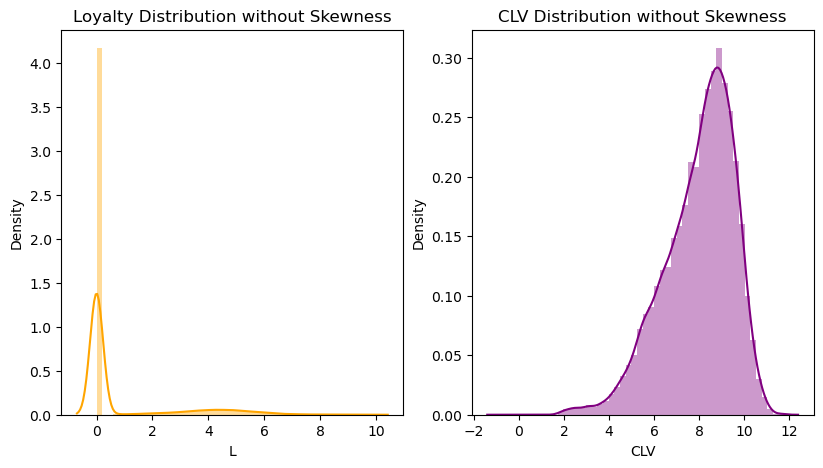

In [21]:
# Plot the distribution of the data
plt.figure(figsize=(15, 5))

# Plot subplots for L and CLV
plt.subplot(1, 3, 1)
sns.distplot(loyalty_log, color='orange')
plt.title('Loyalty Distribution without Skewness')

plt.subplot(1, 3, 2)
sns.distplot(clv_log, color='purple')
plt.title('CLV Distribution without Skewness')

plt.show()

In [22]:
# Create new dataframe with the unskewed data
df_ = pd.DataFrame({'Recency': recency_log, 'Frequency': frequency_log, 'Monetary': monetary_log, 'Loyalty': loyalty_log, 'CLV': clv_log})
df_.head()

,Recency,Frequency,Monetary,Loyalty,CLV
0,6.19,4.63,11.53,0.00,9.37
1,5.59,4.08,10.50,0.00,8.55
2,5.59,5.33,12.55,5.30,9.92
3,5.87,4.25,10.41,4.93,7.91
4,5.85,4.09,10.39,0.00,8.95


In [23]:
scaler_rfm = StandardScaler()
scaler_rfm.fit(df_)

# Standardizing the data
rfm_standardized = scaler_rfm.transform(df_)

print('mean:', rfm_standardized.mean(axis=0).round(2))
print('std:', rfm_standardized.std(axis=0).round(2))

mean: [ 0. -0. -0. -0. -0.]
std: [1. 1. 1. 1. 1.]


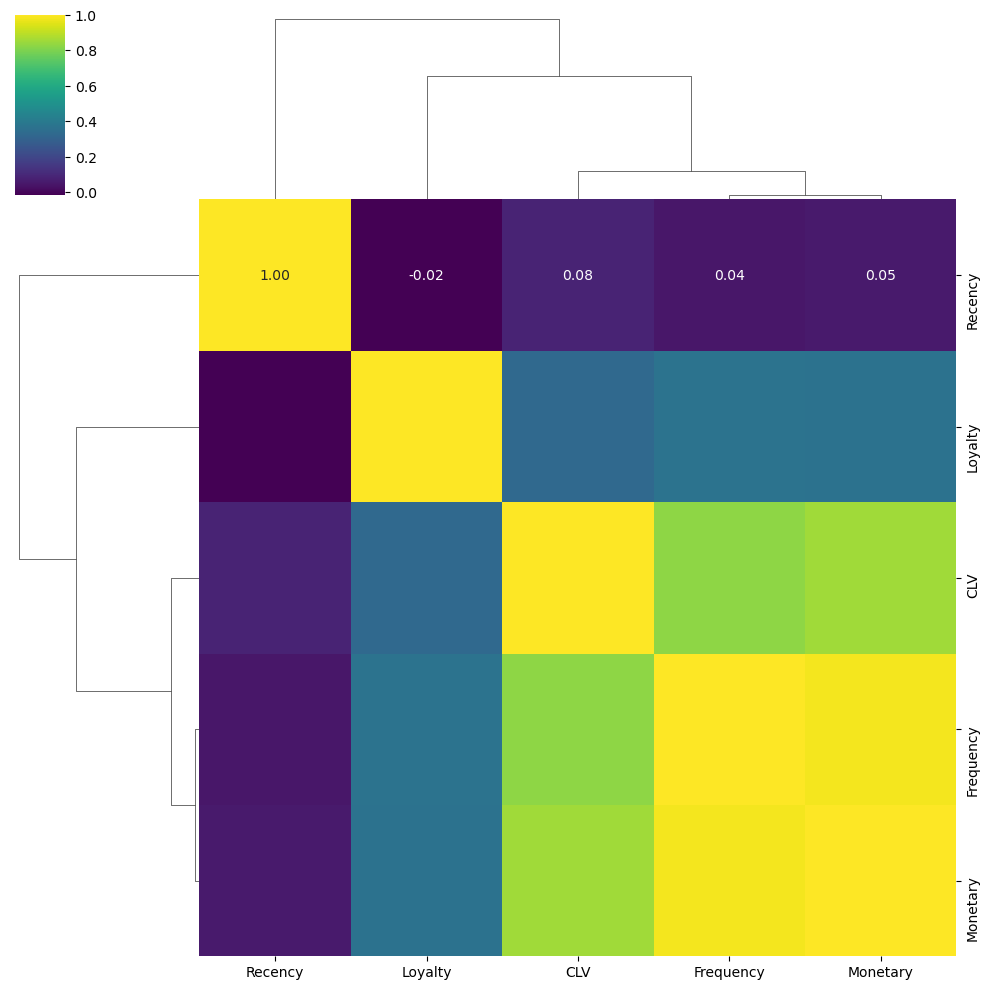

In [24]:
# Clustermap of df_ data
sns.clustermap(df_.corr(), cmap='viridis', annot=True, fmt=".2f")

Number of clusters: 2
Inertia score: [78209.74536738072]
Silhouette score (euc): 0.34
Silhouette score (cos): 0.55
Silhouette score (man): 0.4
Davies Bouldin Score: 1.1
Calinski-Harabasz Score: [16586.13452463244]
---------------------------------
Number of clusters: 3
Inertia score: [78209.74536738072, 57460.343529179314]
Silhouette score (euc): 0.36
Silhouette score (cos): 0.49
Silhouette score (man): 0.38
Davies Bouldin Score: 1.03
Calinski-Harabasz Score: [16586.13452463244, 15931.991221573884]
---------------------------------
Number of clusters: 4
Inertia score: [78209.74536738072, 57460.343529179314, 46698.91425844707]
Silhouette score (euc): 0.37
Silhouette score (cos): 0.5
Silhouette score (man): 0.36
Davies Bouldin Score: 0.96
Calinski-Harabasz Score: [16586.13452463244, 15931.991221573884, 15044.274677256251]
---------------------------------
Number of clusters: 5
Inertia score: [78209.74536738072, 57460.343529179314, 46698.91425844707, 37118.76343535661]
Silhouette score (e

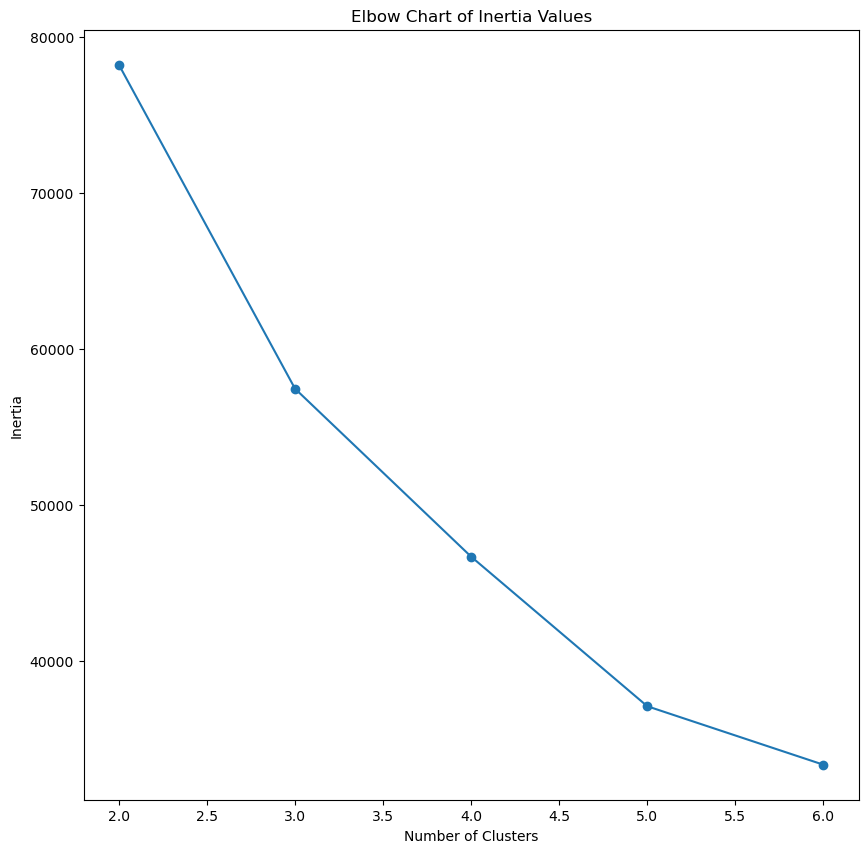

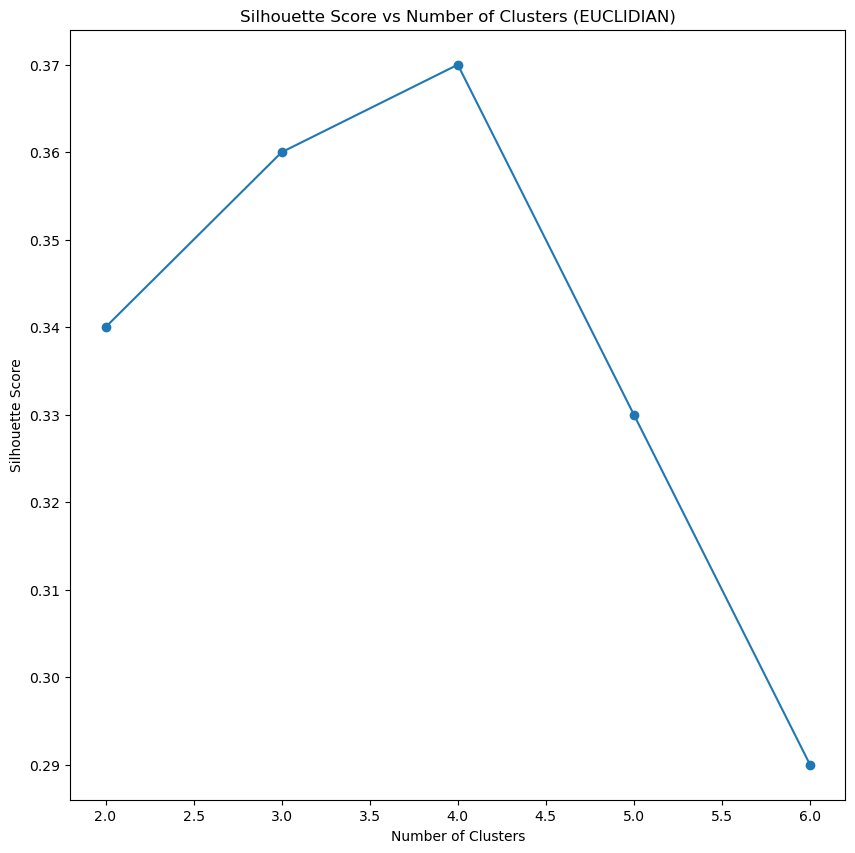

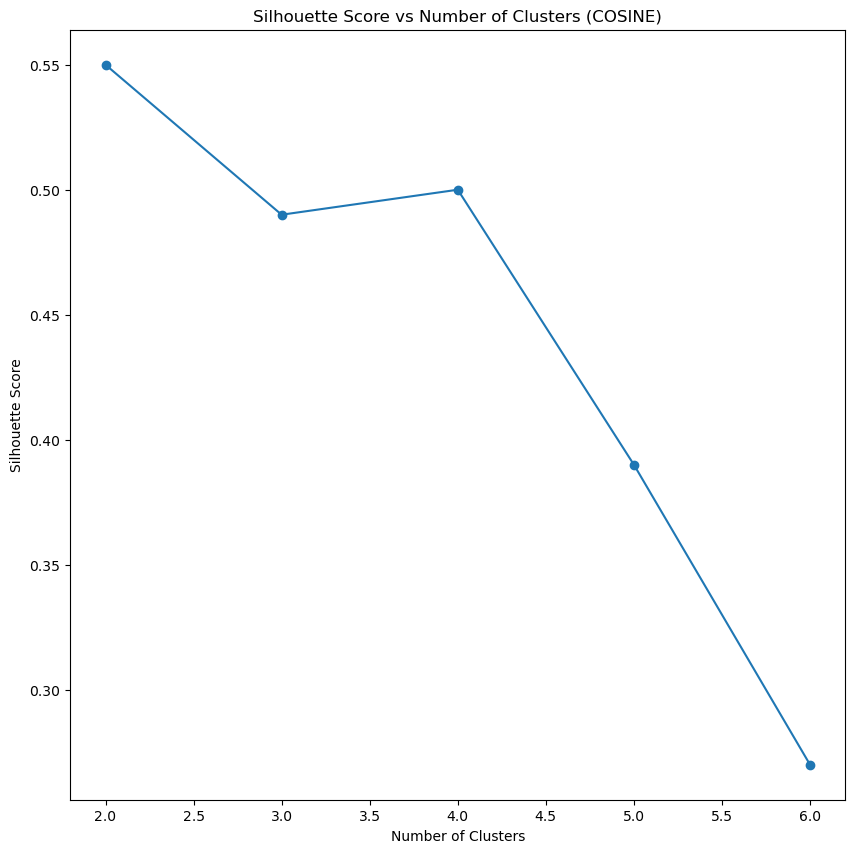

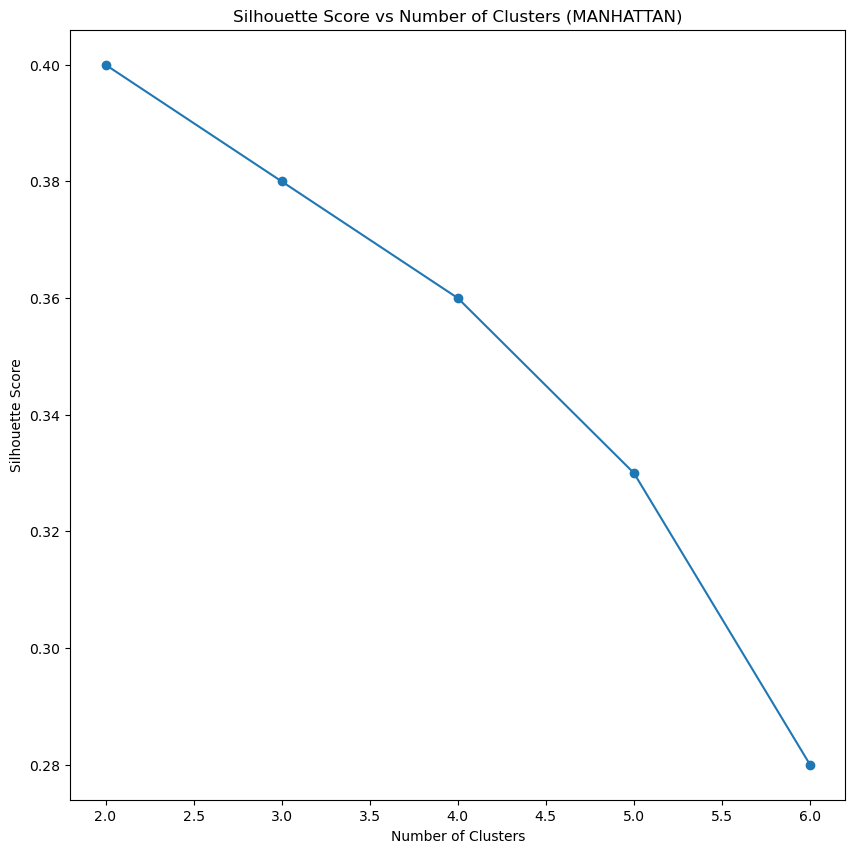

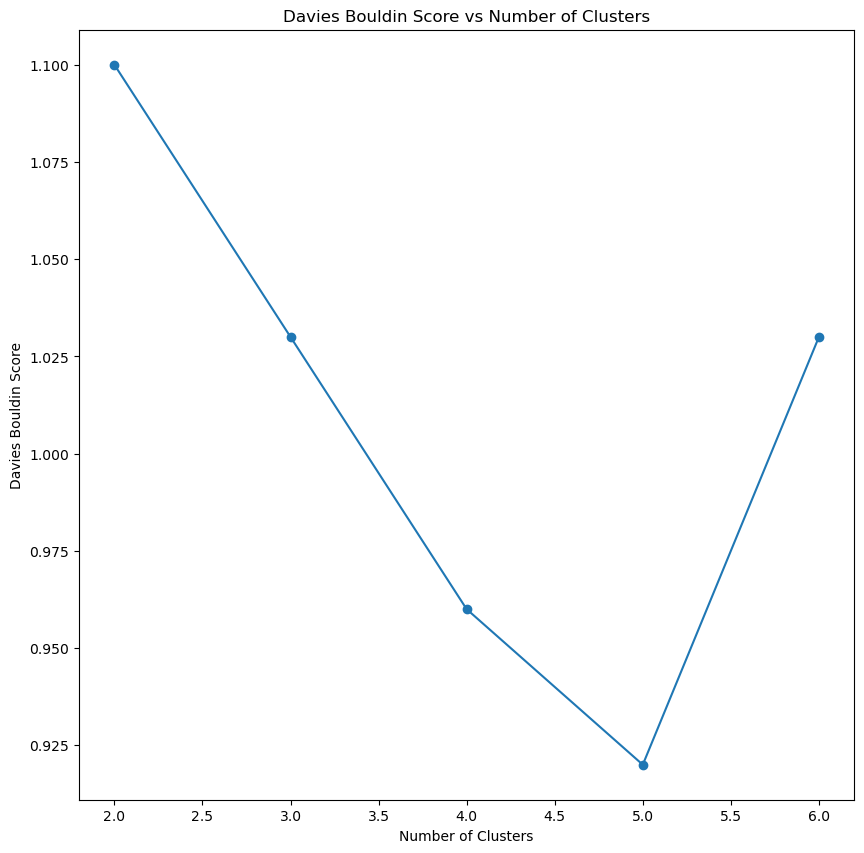

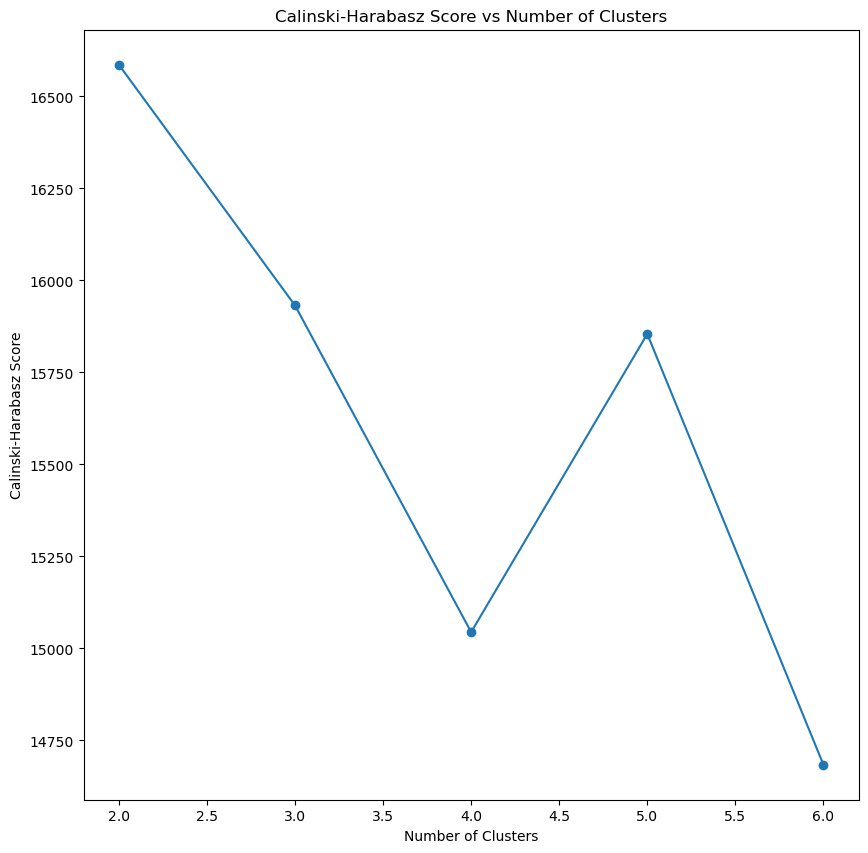

In [60]:
# KMeans Clustering
# Inertia
inertia = []

# Define a list to store the silhouette scores
silhouette_scores = []
silhouette_scores_cosine = []
silhouette_scores_manhattan = []

# Define a list to store the Davies Bouldin scores
davies_bouldin_scores = []

# Define a list to store the Calinski-Harabasz scores
CH_scores = []

# Create a range of K values
k_values = range(2, 7)

# Loop through the K values
for k in k_values:
    # Create a KMeans object
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit the KMeans object to the PCA data
    kmeans.fit(rfm_standardized)

    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

    # Cluster labels
    cluster_labels = kmeans.labels_
    df['Cluster'] = kmeans.labels_

    # Calculate the silhouette score - euclidean distance
    silhouette_score = metrics.silhouette_score(rfm_standardized, cluster_labels, metric='euclidean').round(2)
    silhouette_scores.append(silhouette_score)

    # Calculate the silhouette score - cosine distance
    silhouette_score_cosine = metrics.silhouette_score(rfm_standardized, cluster_labels, metric='cosine').round(2)
    silhouette_scores_cosine.append(silhouette_score_cosine)

    # Calculate the silhouette score - manhattan distance
    silhouette_score_manhattan = metrics.silhouette_score(rfm_standardized, cluster_labels, metric='manhattan').round(2)
    silhouette_scores_manhattan.append(silhouette_score_manhattan)

    # Calculate the Davies Bouldin score
    davies_bouldin_score = metrics.davies_bouldin_score(rfm_standardized, cluster_labels).round(2)
    davies_bouldin_scores.append(davies_bouldin_score)

    # Calculate the Calinski-Harabasz score
    CH_score = calinski_harabasz_score(rfm_standardized, cluster_labels)
    CH_scores.append(CH_score)

    # Print the silhouette score and Davies Bouldin score for the current number of clusters
    print("Number of clusters: {}".format(k))
    print("Inertia score: {}".format(inertia))
    print("Silhouette score (euc): {}".format(silhouette_score))
    print("Silhouette score (cos): {}".format(silhouette_score_cosine))
    print("Silhouette score (man): {}".format(silhouette_score_manhattan))
    print("Davies Bouldin Score: {}".format(davies_bouldin_score))
    print("Calinski-Harabasz Score: {}".format(CH_scores))
    print("---------------------------------")

# Plot the inertia values
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Chart of Inertia Values')
plt.plot(k_values, inertia, marker='o')

# Plot the silhouette scores - euclidian
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (EUCLIDIAN)')
plt.plot(k_values, silhouette_scores, marker='o')

# Plot the silhouette scores - cosine
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (COSINE)')
plt.plot(k_values, silhouette_scores_cosine, marker='o')

# Plot the silhouette scores - manhattan
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (MANHATTAN)')
plt.plot(k_values, silhouette_scores_manhattan, marker='o')

# Plot the Davies Bouldin scores
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('Davies Bouldin Score vs Number of Clusters')
plt.plot(k_values, davies_bouldin_scores, marker='o')

# Plot the Calinski-Harabasz score
plt.figure(figsize=(10, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters')
plt.plot(k_values, CH_scores, marker='o')

In [61]:
df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,L,CLV,Cluster_Agglomerative,Cluster
0,AA00312188,487,102,102182.25,0,11761.28,4,2
1,AA00312390,268,58,36476.70,0,5153.43,1,4
2,AA00325975,268,205,282986.00,200,20385.07,2,1
3,AA00336843,354,69,33192.50,138,2728.84,2,1
4,AA00339761,346,59,32488.30,0,7703.97,1,4


In [111]:
# Selection of the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(rfm_standardized)
df['Cluster'] = kmeans.labels_

# Calculate the average RFM values and size for each cluster
cluster_avg = df.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'L': 'mean',
    'CLV': 'mean'
}).round(0)

In [93]:
df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,L,CLV,Cluster_Agglomerative,Cluster
0,AA00312188,487,102,102182.25,0,11761.28,4,3
1,AA00312390,268,58,36476.70,0,5153.43,1,3
2,AA00325975,268,205,282986.00,200,20385.07,2,1
3,AA00336843,354,69,33192.50,138,2728.84,2,1
4,AA00339761,346,59,32488.30,0,7703.97,1,3


In [139]:
# # Fit the hierarchical clustering to the dataset
# linked = linkage(rfm_standardized, 'ward')

# # Create a dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(linked, orientation='top', distance_sort=True, show_leaf_counts=True)

# # Visualize the dendrogram
# plt.show()

In [110]:
# Create an Agglomerative Clustering object
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the object to the data
agg_clustering.fit(rfm_standardized)

# Assign the clusters to the data
df['Cluster_Agglomerative'] = agg_clustering.labels_

# Calculate the average RFM values and size for each cluster
alg_cluster_avg = df.groupby(['Cluster_Agglomerative']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'L': 'mean',
    'CLV': 'mean'
}).round(0)

         Recency  Frequency  Monetary     L  CLV
Cluster                                         
0          -1.00      -1.01      -1.0 -1.01 -1.0
1          -1.00      -0.99      -1.0 -0.94 -1.0
2          -1.01      -1.00      -1.0 -1.00 -1.0
3          -1.00      -0.99      -1.0 -1.01 -1.0


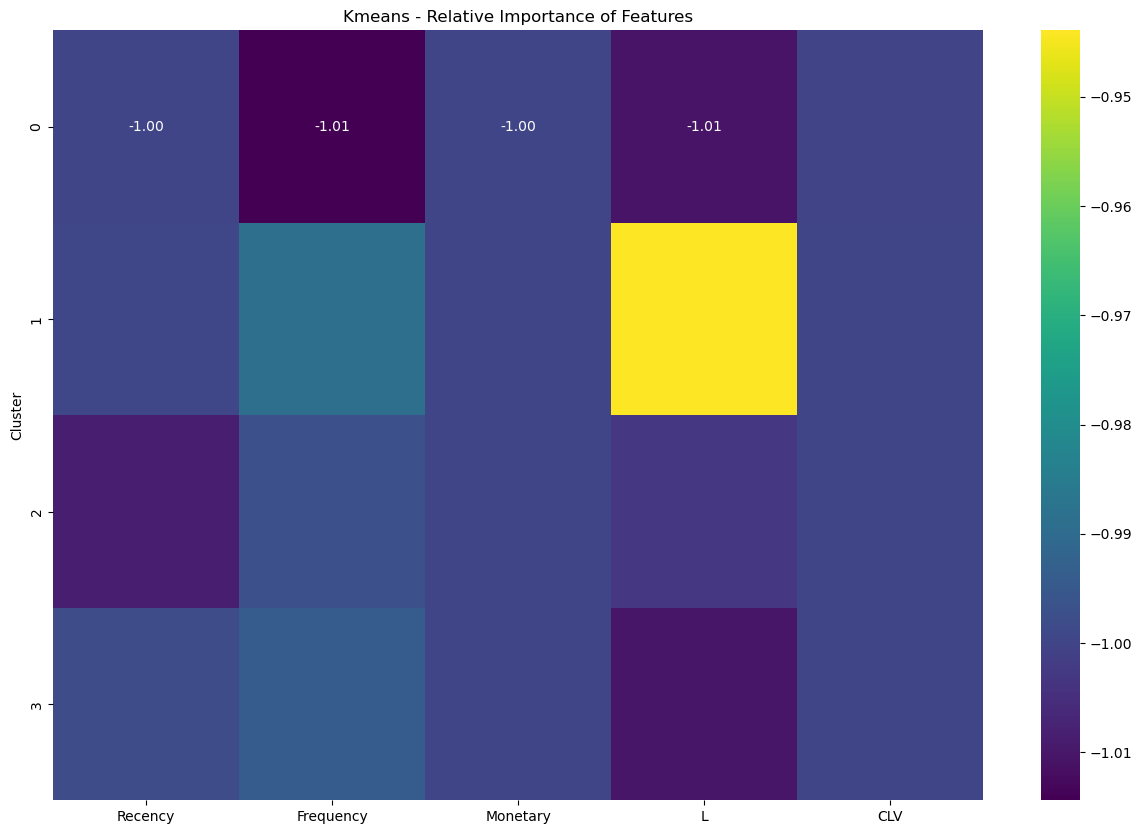

In [95]:
# Relative Importance Score:
# The relative importance score is a way to identify the most important features in a clustering analysis.
# The closer the score is to 0, the less important the feature is to the cluster.
df_norm_kmeans = pd.DataFrame(rfm_standardized, columns=df_copy.columns, index=df_copy.index)
df_norm_kmeans['Cluster'] = df['Cluster']

kmeans_avg = df_norm_kmeans.groupby(['Cluster']).mean()
kmeans_pop_avg = df_copy.mean()
relative_importance = kmeans_avg / kmeans_pop_avg - 1

print(relative_importance.round(2))

plt.figure(figsize=(15, 10))
sns.heatmap(relative_importance, annot=True, fmt='.2f', cmap='viridis')
plt.title('Kmeans - Relative Importance of Features')
plt.show()

In [138]:
# # Relative Importance Score:
# # The relative importance score is a way to identify the most important features in a clustering analysis.
# # The closer the score is to 0, the less important the feature is to the cluster.
# df_norm_agg = pd.DataFrame(rfm_standardized, columns=df_copy.columns, index=df_copy.index)
# df_norm_agg['Cluster'] = df['Cluster_Agglomerative']

# agg_avg = df_norm_agg.groupby(['Cluster']).mean()
# agg_pop_avg = df_copy.mean()
# relative_importance_agg = agg_avg / agg_pop_avg - 1

# plt.figure(figsize=(15, 10))
# sns.heatmap(relative_importance_agg, annot=True, fmt='.2f', cmap='viridis')
# plt.title('Agglomerative - Relative Importance of Features')
# plt.show()

In [97]:
df.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,L,CLV,Cluster_Agglomerative,Cluster
0,AA00312188,487,102,102182.25,0,11761.28,4,3
1,AA00312390,268,58,36476.70,0,5153.43,1,3
2,AA00325975,268,205,282986.00,200,20385.07,2,1
3,AA00336843,354,69,33192.50,138,2728.84,2,1
4,AA00339761,346,59,32488.30,0,7703.97,1,3


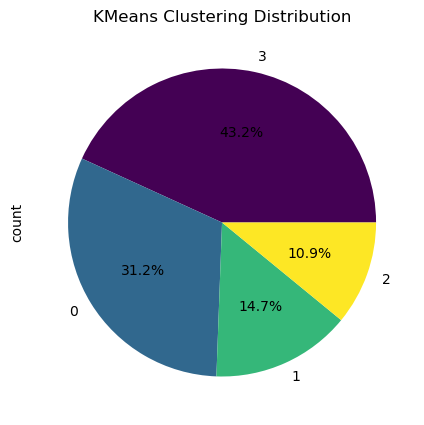

In [137]:
# Plot the piechart of the customer ids per the clusters and agglomerative clusters in subplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis')
plt.title('KMeans Clustering Distribution')

# plt.subplot(1, 2, 2)
# df['Cluster_Agglomerative'].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis')
# plt.title('Agglomerative Clustering Distribution')

plt.show()

In [116]:
# Print the average values from KMeans and Agglomerative Clustering
print('---------------------------------------------------------------------------')
print('KMeans Cluster AVG Summary')
print('---------------------------------------------------------------------------')
print(cluster_avg)
print('---------------------------------------------------------------------------')
print('---------------------------------------------------------------------------')
print('Agglomerative Cluster AVG Summary')
print('---------------------------------------------------------------------------')
print(alg_cluster_avg)
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
KMeans Cluster AVG Summary
---------------------------------------------------------------------------
        Recency Frequency  Monetary             L      CLV
           mean      mean      mean  count   mean     mean
Cluster                                                   
0         220.0      23.0    5190.0   8035    0.0    905.0
1         255.0     140.0  250811.0   3770  260.0  13431.0
2          22.0      81.0   85787.0   2812    8.0   7059.0
3         288.0      99.0  133207.0  11110    0.0   8874.0
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Agglomerative Cluster AVG Summary
---------------------------------------------------------------------------
                      Recency Frequency  Monetary            L      CLV
                         mean      mean      mean count   mean     mean
Cl

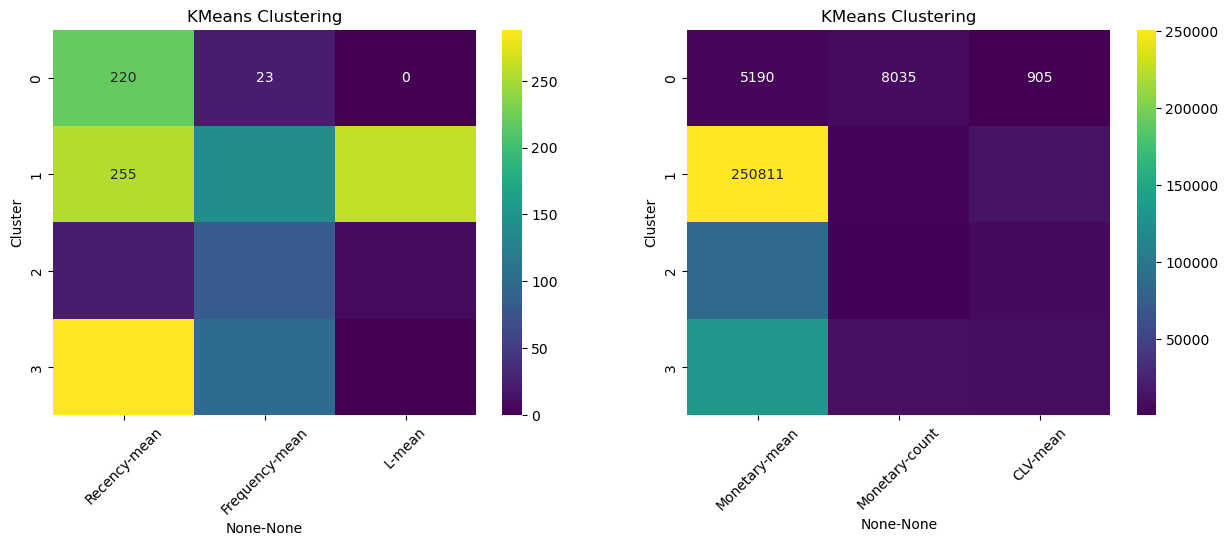

In [136]:
# Plot a heatmap of cluster_avg - the average values of the columns per cluster
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
# Rotate the x-axis labels
plt.xticks(rotation=45)
sns.heatmap(cluster_avg[['Recency', 'Frequency', 'L']], annot=True, fmt='.0f', cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
# Rotate the x-axis labels
plt.xticks(rotation=45)
sns.heatmap(cluster_avg[['Monetary', 'CLV']], annot=True, fmt='.0f', cmap='viridis')
plt.title('KMeans Clustering')


plt.show()

In [135]:
# # Plot a heatmap of cluster_avg - the average values of the columns per cluster
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 2, 1)
# # Rotate the x-axis labels
# plt.xticks(rotation=45)
# sns.heatmap(alg_cluster_avg[['Recency', 'Frequency', 'L']], annot=True, fmt='.0f', cmap='viridis')
# plt.title('Agglomerative Clustering')

# plt.subplot(1, 2, 2)
# # Rotate the x-axis labels
# plt.xticks(rotation=45)
# sns.heatmap(alg_cluster_avg[['Monetary', 'CLV']], annot=True, fmt='.0f', cmap='viridis')
# plt.title('Agglomerative Clustering')

# plt.show()

### Interpretation of Heatmap containing Kmeans Clustering and Segment Labels
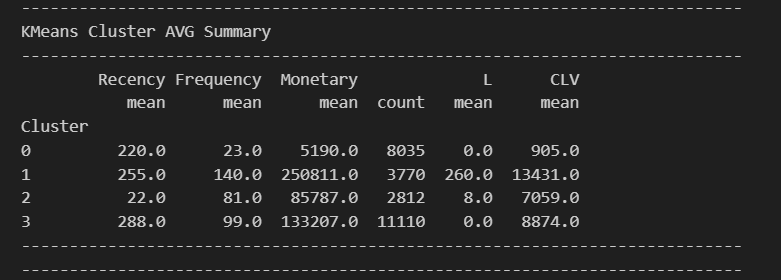
- We can come up with the following labels for the different groupings:
    - `Loyal Customers` - These are denoted to have the highest `Frequency`, `Monetary`, `Loyalty Score` and `Customer Lifetime Value` metrics and should be targetted with exclusive offers and reward programs to keep them loyal. From our assessment they are mostly from `Cluster 1`, as is shown by the relative importance heatmap.
    - `Recent Buyers` - These are denoted to have the high `Recency`, moderate `Frequency` or `Monetary` RFM metrics and low `Loyalty Scores`, they may not be high spenders and thus should be engaged with targeted campaigns to try raise their level to loyal customers. They fall in `Cluster 3`, as is shown by the relative importance heatmap. 
    - `At-Risk Customers` - These are denoted to have low `Recency`, and variable to moderate frequency and monetary RFM metrics. They need to be won back with attractive offers that consider increasing spending and/or increasing frequency of purchases. From our assessment they are mostly from `Cluster 2`, as is shown by the relative importance heatmap.
    - `New Customers` - These are denoted to have the lowest `Customer Lifetime Value`, `Loyalty Score` and low `Monetary` metrics as well as a low `Customer Lifetime Value`and `Loaylty Scores` and should converted to repeat-buyers through bundle offers for products, personalised product recommendations, constant engagement with feedback and surveys and invite them to join the loyalty program i.e. Buy 2 Get 1 Free. From our assessment they are mostly from `Cluster 0`, as is shown by the relative importance heatmap.
 

### Interpretation of Heatmap containing Agglomerative Clustering and Segment Labels
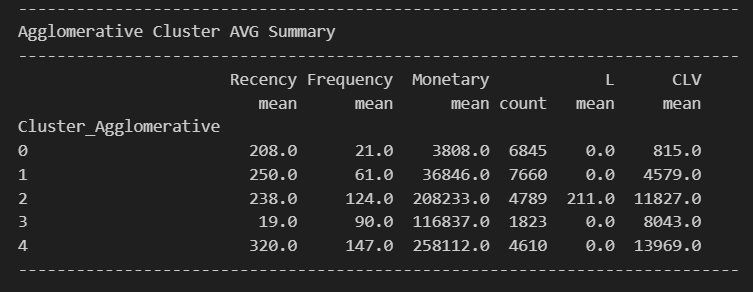
- We can come up with the following labels for the different groupings:
    - `Loyal Customers` - These are denoted to have the highest `Frequency`, `Monetary`, `Loyalty Score` and `Customer Lifetime Value` metrics and should be targetted with exclusive offers and reward programs to keep them loyal. From our assessment they are mostly from `Cluster 2`, as is shown by the relative importance heatmap.
    - `Recent Buyers` - These are denoted to have the high `Recency`, moderate `Frequency` or `Monetary` RFM metrics and low `Loyalty Scores`, they may not be high spenders and thus should be engaged with targeted campaigns to try raise their level to loyal customers. They fall in `Cluster 4`, as is shown by the relative importance heatmap. 
    - `At-Risk Customers` - These are denoted to have low `Recency`, and variable to moderate frequency and monetary RFM metrics. They need to be won back with attractive offers that consider increasing spending and/or increasing frequency of purchases. From our assessment they are mostly from `Cluster 3`, as is shown by the relative importance heatmap.
    - `Switching Customers` - These are denoted to have low `Loyalty Scores`, moderate `Customer Lifetime Value`, moderate `Monetary` and high `Recency`. To convert them to the level above i.e. `Recent Buyers`, they can be given continuous engagement, unexpected surprise offers, seeking insights from them on their reasons to try improve their experience. They are denoted by `Cluster 1`.
    - `New Customers` - These are denoted to have the lowest `Customer Lifetime Value`, `Loyalty Score` and low `Monetary` metrics as well as a low `Customer Lifetime Value`and `Loaylty Scores` and should converted to repeat-buyers through bundle offers for products, personalised product recommendations, constant engagement with feedback and surveys and invite them to join the loyalty program i.e. Buy 2 Get 1 Free. From our assessment they are mostly from `Cluster 0`, as is shown by the relative importance heatmap.

In [121]:
# Read the RFM_Label csv file as df_og_labels
df_og_labels = pd.read_csv('./datasets/1_SEGMENTATION/RFM_Label.csv')
df_og_labels.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,mode_weekday,mode_origin,mode_payment_method,mode_time_of_day,L,AQC,CLV,R,F,M,RFM_Segment,RFM_Score,General_Segment
0,AA00312188,487,102,102182.25,Thursday,WEB,CASH,afternoon,0,1.21,11761.28,1,3,4,134,8,Silver
1,AA00312390,268,58,36476.70,Saturday,WEB,CASH,afternoon,0,1.34,5153.43,2,2,3,223,7,Silver
2,AA00325975,268,205,282986.00,Saturday,WEB,DEBIT CARD,morning,200,1.02,20385.07,2,4,4,244,10,Gold
3,AA00336843,354,69,33192.50,Thursday,WEB,CASH,afternoon,138,1.03,2728.84,2,3,3,233,8,Silver
4,AA00339761,346,59,32488.30,Friday,WEB,CASH,afternoon,0,1.14,7703.97,2,2,3,223,7,Silver


In [122]:
# Create a copy of df_og_label and drop Recency, Frequency, Monetary, L, AQC, CLV, R, F, M, RFM_Segment, RFM_Score columns
og_labels = df_og_labels.copy()
og_labels = og_labels.drop(['Recency', 'Frequency', 'Monetary', 'L', 'AQC', 'CLV', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score'], axis=1)
og_labels.head()

,CUSTOMER_ID,mode_weekday,mode_origin,mode_payment_method,mode_time_of_day,General_Segment
0,AA00312188,Thursday,WEB,CASH,afternoon,Silver
1,AA00312390,Saturday,WEB,CASH,afternoon,Silver
2,AA00325975,Saturday,WEB,DEBIT CARD,morning,Gold
3,AA00336843,Thursday,WEB,CASH,afternoon,Silver
4,AA00339761,Friday,WEB,CASH,afternoon,Silver


In [124]:
# Merge df with og_labels on CUSTOMER_ID as df_labels
df_labels = pd.merge(df, og_labels, on='CUSTOMER_ID')
df_labels.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,L,CLV,Cluster_Agglomerative,Cluster,mode_weekday,mode_origin,mode_payment_method,mode_time_of_day,General_Segment
0,AA00312188,487,102,102182.25,0,11761.28,4,3,Thursday,WEB,CASH,afternoon,Silver
1,AA00312390,268,58,36476.70,0,5153.43,1,3,Saturday,WEB,CASH,afternoon,Silver
2,AA00325975,268,205,282986.00,200,20385.07,2,1,Saturday,WEB,DEBIT CARD,morning,Gold
3,AA00336843,354,69,33192.50,138,2728.84,2,1,Thursday,WEB,CASH,afternoon,Silver
4,AA00339761,346,59,32488.30,0,7703.97,1,3,Friday,WEB,CASH,afternoon,Silver


In [125]:
# Add new columns C_l and CA_l as follows:
# C_l from Cluster where the values are 0 - 'New Customer', 1 - 'Loyal Customer', 2 - 'At Risk Customer', 3 - 'Recent Customer'
# CA_l from Cluster_Agglomerative where the values are 0 - 'New Customer', 1 - 'Switching Customer', 2 - 'Loyal Customer', 3 - 'At Risk Customer', 4 - 'Recent Customer'
df_labels['C_l'] = df_labels['Cluster'].map({0: 'New Customer', 1: 'Loyal Customer', 2: 'At Risk Customer', 3: 'Recent Customer'})
df_labels['CA_l'] = df_labels['Cluster_Agglomerative'].map({0: 'New Customer', 1: 'Switching Customer', 2: 'Loyal Customer', 3: 'At Risk Customer', 4: 'Recent Customer'})
df_labels.head()

,CUSTOMER_ID,Recency,Frequency,Monetary,L,CLV,Cluster_Agglomerative,Cluster,mode_weekday,mode_origin,mode_payment_method,mode_time_of_day,General_Segment,C_l,CA_l
0,AA00312188,487,102,102182.25,0,11761.28,4,3,Thursday,WEB,CASH,afternoon,Silver,Recent Customer,Recent Customer
1,AA00312390,268,58,36476.70,0,5153.43,1,3,Saturday,WEB,CASH,afternoon,Silver,Recent Customer,Switching Customer
2,AA00325975,268,205,282986.00,200,20385.07,2,1,Saturday,WEB,DEBIT CARD,morning,Gold,Loyal Customer,Loyal Customer
3,AA00336843,354,69,33192.50,138,2728.84,2,1,Thursday,WEB,CASH,afternoon,Silver,Loyal Customer,Loyal Customer
4,AA00339761,346,59,32488.30,0,7703.97,1,3,Friday,WEB,CASH,afternoon,Silver,Recent Customer,Switching Customer


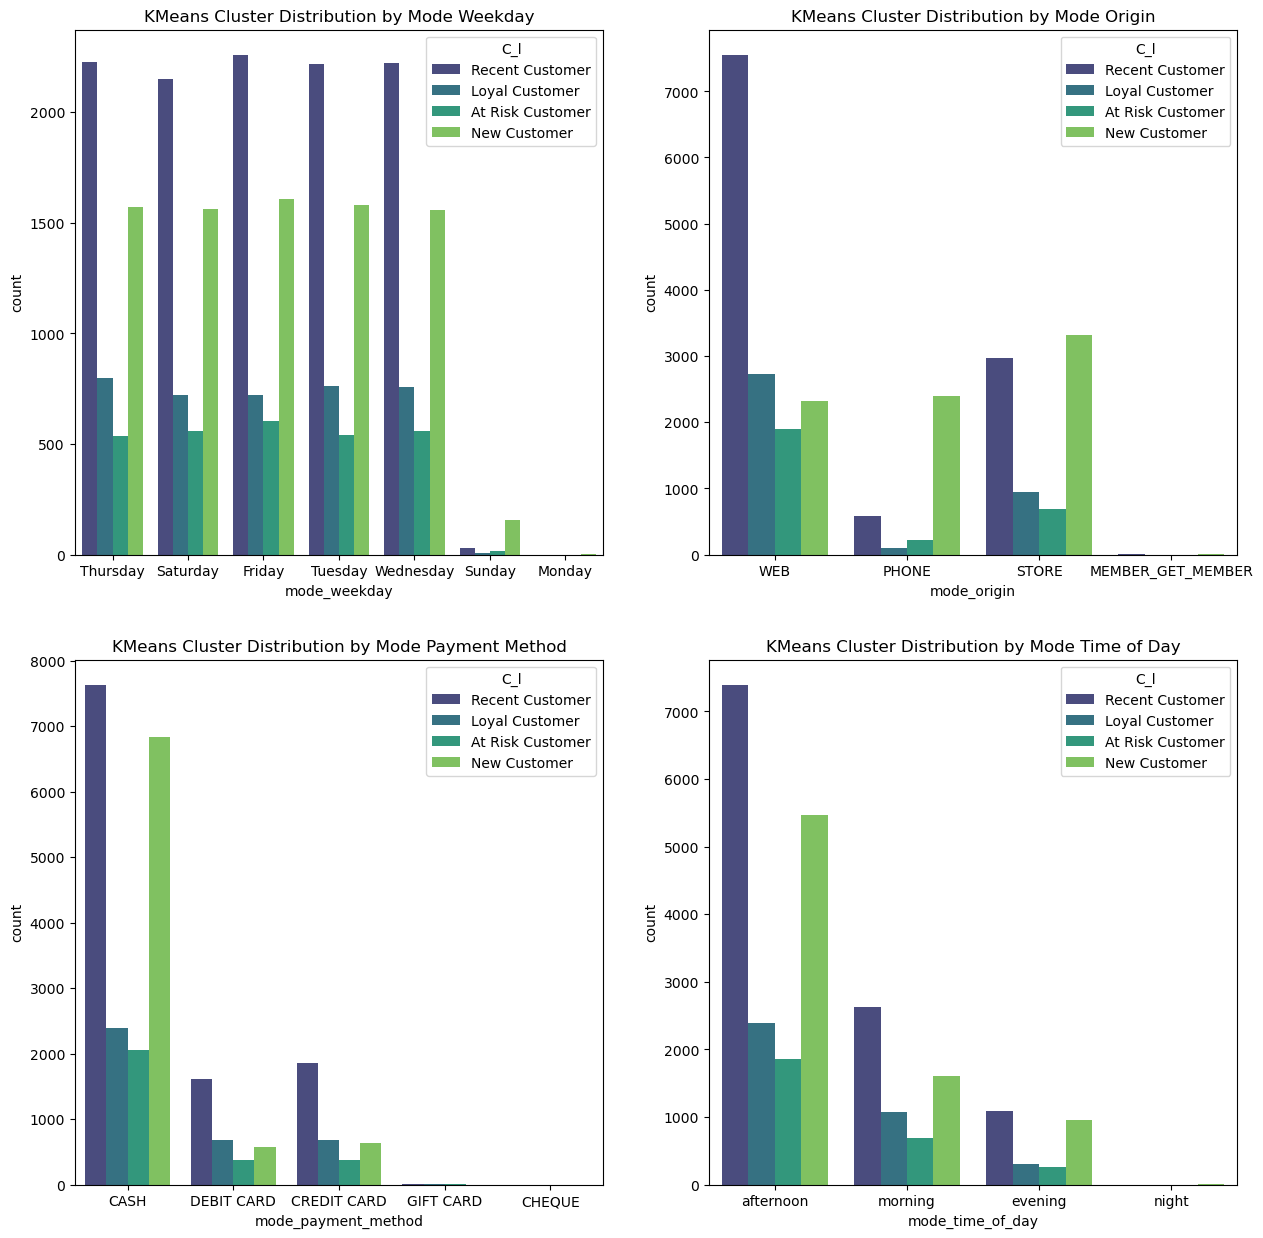

In [127]:
# Plot the distribution of df_labels['C_l'] against the following columns: mode_weekday, mode_origin, mode_payment_method, mode_time_of_day
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.countplot(x='mode_weekday', hue='C_l', data=df_labels, palette='viridis')
plt.title('KMeans Cluster Distribution by Mode Weekday')

plt.subplot(2, 2, 2)
sns.countplot(x='mode_origin', hue='C_l', data=df_labels, palette='viridis')
plt.title('KMeans Cluster Distribution by Mode Origin')

plt.subplot(2, 2, 3)
sns.countplot(x='mode_payment_method', hue='C_l', data=df_labels, palette='viridis')
plt.title('KMeans Cluster Distribution by Mode Payment Method')

plt.subplot(2, 2, 4)
sns.countplot(x='mode_time_of_day', hue='C_l', data=df_labels, palette='viridis')
plt.title('KMeans Cluster Distribution by Mode Time of Day')

plt.show()

### Analysis of best days and targets to run marketing campaigns
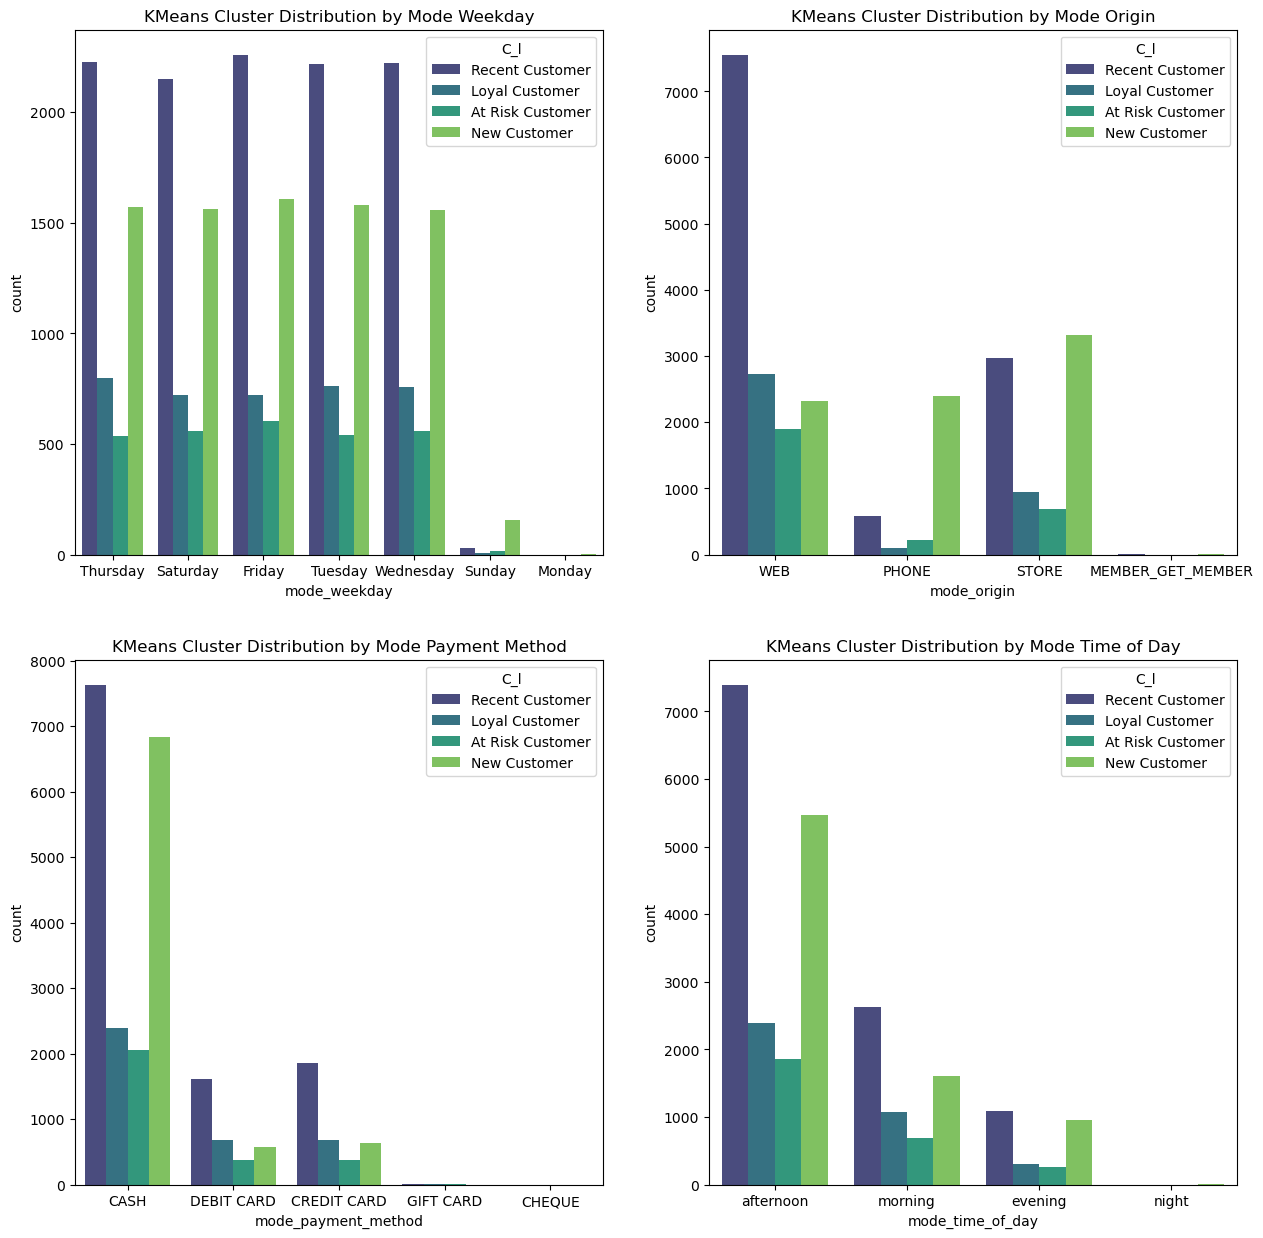

- Friday afternoon is the best day to speak to all the groups about general marketing campaigns
- The most effective target method is web with Loyal customer not preferring being contacted via phone, while new customers can be met in store

In [131]:
# # Plot the distribution of df_labels['CA_l'] against the following columns: mode_weekday, mode_origin, mode_payment_method, mode_time_of_day
# plt.figure(figsize=(15, 15))

# plt.subplot(2, 2, 1)
# sns.countplot(x='mode_weekday', hue='CA_l', data=df_labels, palette='viridis')
# plt.title('Agglomerative Cluster Distribution by Mode Weekday')

# plt.subplot(2, 2, 2)
# sns.countplot(x='mode_origin', hue='CA_l', data=df_labels, palette='viridis')
# plt.title('Agglomerative Cluster Distribution by Mode Origin')

# plt.subplot(2, 2, 3)
# sns.countplot(x='mode_payment_method', hue='CA_l', data=df_labels, palette='viridis')
# plt.title('Agglomerative Cluster Distribution by Mode Payment Method')

# plt.subplot(2, 2, 4)
# sns.countplot(x='mode_time_of_day', hue='CA_l', data=df_labels, palette='viridis')
# plt.title('Agglomerative Cluster Distribution by Mode Time of Day')

# plt.show()

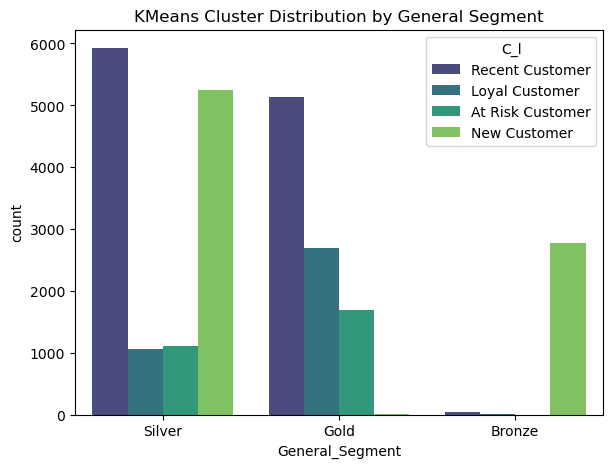

In [132]:
# Plot C_l and CA_l against General_Segment
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='General_Segment', hue='C_l', data=df_labels, palette='viridis')
plt.title('KMeans Cluster Distribution by General Segment')

# plt.subplot(1, 2, 2)
# sns.countplot(x='General_Segment', hue='CA_l', data=df_labels, palette='viridis')
# plt.title('Agglomerative Cluster Distribution by General Segment')

plt.show()

### Comparisson of orignal RFM segments with new cluster labels

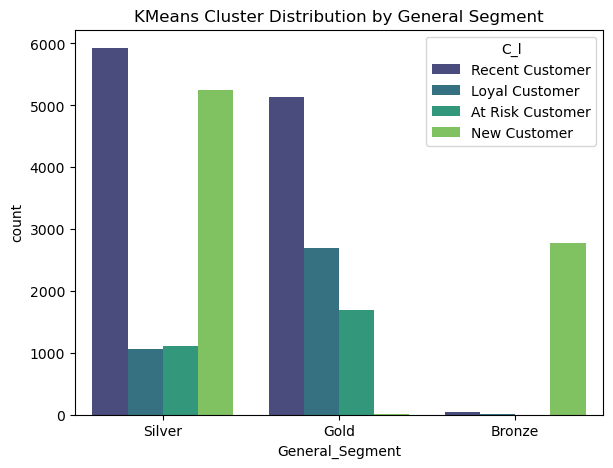

- From the comparisson of the original RFM labels vs the new cluster labels we realise inconsistencies in the allocation for most of the clusters.
- This tells us that relying solely on `Recency`, `Frequency` and `Monetary` won't support accurate customer segmentation.
- Thus we included `Loyalty Score` and `Customer Lifetime Value` metrics to paint a better picture of our clusters.